### Example of LSTM and GRU - IMDB dataset

Loading and pre-processing dataset

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Dense, Embedding


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
input_train = sequence.pad_sequences(x_train, maxlen=500)
input_test = sequence.pad_sequences(x_test, maxlen=500)

Defining and training the LSTM model

In [4]:
model = models.Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict = history.history

Epoch 1/10
157/157 [==============================] - 45s 268ms/step - loss: 0.6026 - acc: 0.6634 - val_loss: 0.4200 - val_acc: 0.8322
Epoch 2/10
157/157 [==============================] - 42s 268ms/step - loss: 0.3529 - acc: 0.8526 - val_loss: 0.3875 - val_acc: 0.8328
Epoch 3/10
157/157 [==============================] - 39s 249ms/step - loss: 0.2761 - acc: 0.8938 - val_loss: 0.3299 - val_acc: 0.8608
Epoch 4/10
157/157 [==============================] - 40s 252ms/step - loss: 0.2352 - acc: 0.9099 - val_loss: 0.2881 - val_acc: 0.8818
Epoch 5/10
157/157 [==============================] - 41s 264ms/step - loss: 0.2045 - acc: 0.9235 - val_loss: 0.3368 - val_acc: 0.8776
Epoch 6/10
157/157 [==============================] - 40s 256ms/step - loss: 0.1789 - acc: 0.9343 - val_loss: 0.3129 - val_acc: 0.8788
Epoch 7/10
157/157 [==============================] - 33s 213ms/step - loss: 0.1614 - acc: 0.9432 - val_loss: 0.3931 - val_acc: 0.8640
Epoch 8/10
157/157 [==============================] - 3

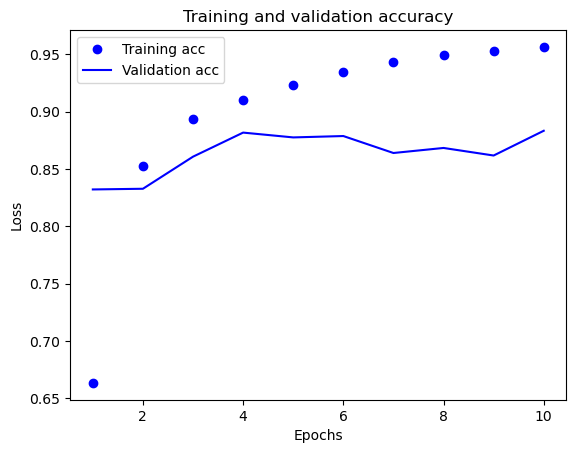

[0.39749622344970703, 0.8711199760437012]


In [6]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model.evaluate(input_test, y_test, verbose = 0)
print(results)

Defining and training an LSTM with two layers

In [7]:
model2 = models.Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32, return_sequences = True))
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model2.summary()

history2 = model2.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

history_dict2 = history2.history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 74s 447ms/step - loss: 0.6021 - acc: 0.6453 - val_loss: 0.4132 - val_acc: 0.8172
Epoch 2/5
157/157 [===========================

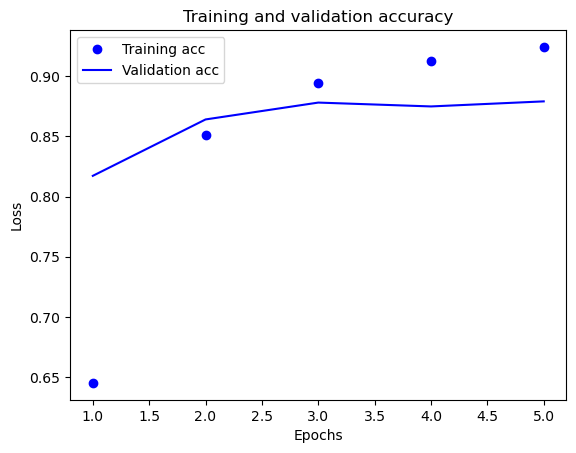

[0.3390980362892151, 0.8729199767112732]


In [8]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict2['acc'] 
val_acc_values = history_dict2['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model2.evaluate(input_test, y_test, verbose = 0)
print(results)

Defining and training a GRU model

In [9]:
from tensorflow.keras.layers import GRU
model3 = models.Sequential()
model3.add(Embedding(10000, 32))
model3.add(GRU(32))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model3.summary()

history3 = model3.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

history_dict3 = history3.history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 35s 208ms/step - loss: 0.6324 - acc: 0.6255 - val_loss: 0.4493 - val_acc: 0.7870
Epoch 2/5
157/157 [==============================] - 33s 210ms/step - loss: 0.3688 - acc: 0.8407 - val_loss: 0.3466 - val_acc: 0.8524
Epoch 3/5
157/157 [=========================

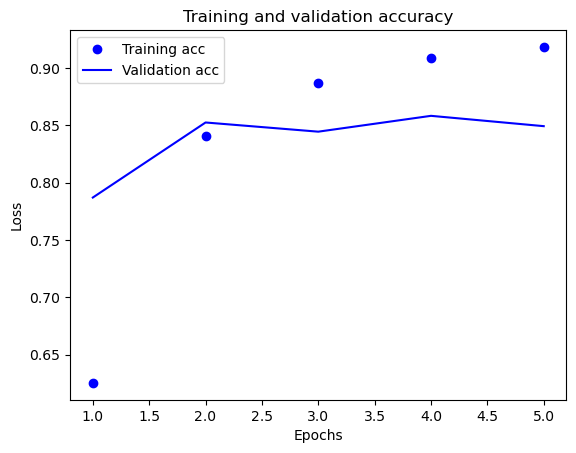

[0.3725026249885559, 0.8449599742889404]


In [10]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict3['acc'] 
val_acc_values = history_dict3['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model3.evaluate(input_test, y_test, verbose = 0)
print(results)

LSTM with Dropout

In [11]:
from tensorflow.keras.layers import Dropout
model4 = models.Sequential()
model4.add(Embedding(10000, 32))
model4.add(LSTM(32, return_sequences = True))
model4.add(Dropout(0.2))
model4.add(LSTM(32))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model4.summary()

history4 = model4.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict4 = history4.history

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-tr

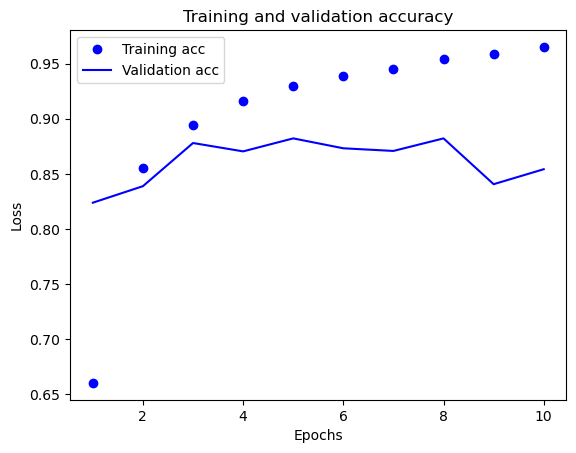

[0.40882375836372375, 0.8518000245094299]


In [12]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict4['acc'] 
val_acc_values = history_dict4['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model4.evaluate(input_test, y_test, verbose = 0)
print(results)